# Vorticidade e Divergência

### Importar os pacotes de funcoes

In [1]:
import numpy as np

In [3]:
a=np.arange(0,100)

In [7]:
a[::10]

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [27]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import mygrads as mg # https://github.com/davidmnielsen/mygrads

### Load dados do arquivo

Arquivos salvos no script Anomalias.ipynb

In [28]:
# Média diária do episódio
ds = xr.open_dataset('zcas_27a31Out2009.nc')
lat = ds['lat'].values
lon = ds['lon'].values
u200_zcas = ds['u200'].values
v200_zcas = ds['v200'].values
u500_zcas = ds['u500'].values
v500_zcas = ds['v500'].values
w500_zcas = ds['w500'].values
z500_zcas = ds['z500'].values
u900_zcas = ds['u900'].values
v900_zcas = ds['v900'].values

In [29]:
# Média diária Climatológica
ds = xr.open_dataset('clima_27a31Out.nc')
lat = ds['lat'].values
lon = ds['lon'].values
u200_clima = ds['u200'].values
v200_clima = ds['v200'].values
u500_clima = ds['u500'].values
v500_clima = ds['v500'].values
w500_clima = ds['w500'].values
z500_clima = ds['z500'].values
u900_clima = ds['u900'].values
v900_clima = ds['v900'].values

In [30]:
# Anomalia
ds = xr.open_dataset('zcas_27a31Out2009_anom.nc')
lat = ds['lat'].values
lon = ds['lon'].values
u200_anom = ds['u200'].values
v200_anom = ds['v200'].values
u500_anom = ds['u500'].values
v500_anom = ds['v500'].values
w500_anom = ds['w500'].values
z500_anom = ds['z500'].values
u900_anom = ds['u900'].values
v900_anom = ds['v900'].values

### Vento e Geopotencial em 500 hPa

/home/david/anaconda3/envs/zcas/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


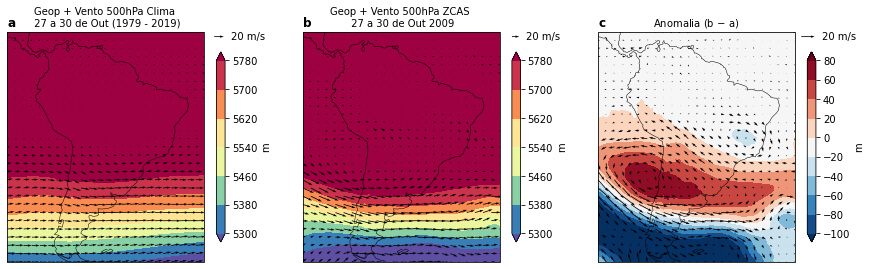

In [31]:
fig=plt.figure(figsize=(15,5))

ax = plt.subplot(131, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon, lat, z500_clima, extend='both', cmap = 'Spectral_r', transform=ccrs.PlateCarree(),
             levels=np.arange(5300,5850,80))
q = ax.quiver(lon[::10], lat[::10], u500_clima[::10, ::10], v500_clima[::10,::10], 
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 20, r'20 m/s', labelpos='E')
plt.colorbar(orientation='vertical', shrink=0.7, label='m')
plt.title('Geop + Vento 500hPa Clima \n 27 a 30 de Out (1979 - 2019)', fontsize=10)
plt.title('a', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(132, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon, lat, z500_zcas, extend='both', cmap = 'Spectral_r', transform=ccrs.PlateCarree(),
             levels=np.arange(5300,5850,80))
q = ax.quiver(lon[::10], lat[::10], u500_zcas[::10, ::10], v500_zcas[::10,::10], 
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 20, r'20 m/s', labelpos='E')
plt.colorbar(orientation='vertical', shrink=0.7, label='m')
plt.title('Geop + Vento 500hPa ZCAS \n 27 a 30 de Out 2009', fontsize=10)
plt.title('b', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(133, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon, lat, z500_anom, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-100,100,20))
q = ax.quiver(lon[::10], lat[::10], u500_anom[::10, ::10], v500_anom[::10,::10], 
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 20, r'20 m/s', labelpos='E')
plt.colorbar(orientation='vertical', shrink=0.7, label='m')
plt.title('Anomalia (b $-$ a)', fontsize=10)
plt.title('c', fontweight='bold', loc='left', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig('zcas_z500.png', dpi=300)
fig.savefig('zcas_z500.pdf')

### Cálculo da Divergência Horizontal e Componente Vertical da Vorticidade Relativa

#### Médias das variáveis nos dias de ZCAS do episódio de Outubro de 2009

In [48]:
div200_clima  = mg.hdivg(u200_clima[::5, ::5], v200_clima[::5, ::5], lat[::5], lon[::5]) *10**5
vort200_clima = mg.hcurl(u200_clima[::5, ::5], v200_clima[::5, ::5], lat[::5], lon[::5]) *10**5
div500_clima  = mg.hdivg(u500_clima[::5, ::5], v500_clima[::5, ::5], lat[::5], lon[::5]) *10**5
vort500_clima = mg.hcurl(u500_clima[::5, ::5], v500_clima[::5, ::5], lat[::5], lon[::5]) *10**5
div900_clima  = mg.hdivg(u900_clima[::5, ::5], v500_clima[::5, ::5], lat[::5], lon[::5]) *10**5
vort900_clima = mg.hcurl(u900_clima[::5, ::5], v500_clima[::5, ::5], lat[::5], lon[::5]) *10**5

div200_zcas  = mg.hdivg(u200_zcas[::5, ::5], v200_zcas[::5, ::5], lat[::5], lon[::5]) *10**5
vort200_zcas = mg.hcurl(u200_zcas[::5, ::5], v200_zcas[::5, ::5], lat[::5], lon[::5]) *10**5
div500_zcas  = mg.hdivg(u500_zcas[::5, ::5], v500_zcas[::5, ::5], lat[::5], lon[::5]) *10**5
vort500_zcas = mg.hcurl(u500_zcas[::5, ::5], v500_zcas[::5, ::5], lat[::5], lon[::5]) *10**5
div900_zcas  = mg.hdivg(u900_zcas[::5, ::5], v500_zcas[::5, ::5], lat[::5], lon[::5]) *10**5
vort900_zcas = mg.hcurl(u900_zcas[::5, ::5], v500_zcas[::5, ::5], lat[::5], lon[::5]) *10**5

div200_anom  = mg.hdivg(u200_anom[::5, ::5], v200_anom[::5, ::5], lat[::5], lon[::5]) *10**5
vort200_anom = mg.hcurl(u200_anom[::5, ::5], v200_anom[::5, ::5], lat[::5], lon[::5]) *10**5
div500_anom  = mg.hdivg(u500_anom[::5, ::5], v500_anom[::5, ::5], lat[::5], lon[::5]) *10**5
vort500_anom = mg.hcurl(u500_anom[::5, ::5], v500_anom[::5, ::5], lat[::5], lon[::5]) *10**5
div900_anom  = mg.hdivg(u900_anom[::5, ::5], v500_anom[::5, ::5], lat[::5], lon[::5]) *10**5
vort900_anom = mg.hcurl(u900_anom[::5, ::5], v500_anom[::5, ::5], lat[::5], lon[::5]) *10**5

### Figuras

#### Div 900

/home/david/anaconda3/envs/zcas/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


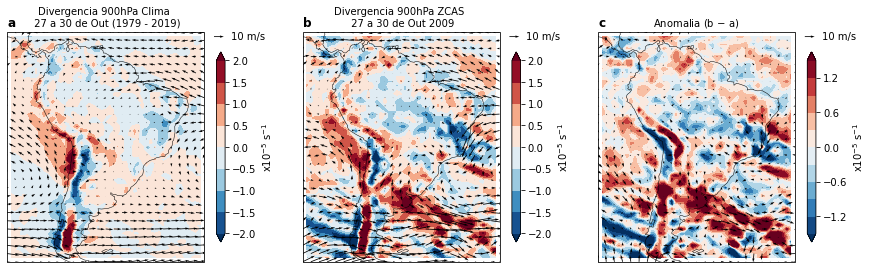

In [83]:
fig=plt.figure(figsize=(15,5))

ax = plt.subplot(131, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], div900_clima, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-2,2.5,0.5))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u900_clima[::10, ::10], v900_clima[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Divergencia 900hPa Clima \n 27 a 30 de Out (1979 - 2019)', fontsize=10)
plt.title('a', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(132, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], div900_zcas, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-2,2.5,0.5))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u900_zcas[::10, ::10], v900_zcas[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Divergencia 900hPa ZCAS \n 27 a 30 de Out 2009', fontsize=10)
plt.title('b', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(133, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], div900_anom, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-1.5,1.8,0.3))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u900_anom[::10, ::10], v900_anom[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Anomalia (b $-$ a)', fontsize=10)
plt.title('c', fontweight='bold', loc='left', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig('zcas_div900.png', dpi=300)
fig.savefig('zcas_div900.pdf')

#### Div 200

/home/david/anaconda3/envs/zcas/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


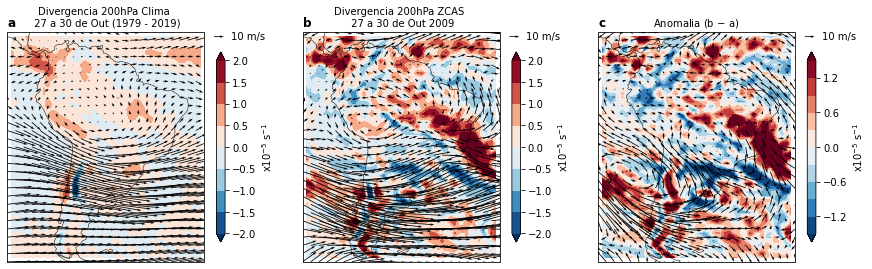

In [82]:
fig=plt.figure(figsize=(15,5))

ax = plt.subplot(131, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], div200_clima, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-2,2.5,0.5))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u200_clima[::10, ::10], v200_clima[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Divergencia 200hPa Clima \n 27 a 30 de Out (1979 - 2019)', fontsize=10)
plt.title('a', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(132, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], div200_zcas, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-2,2.5,0.5))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u200_zcas[::10, ::10], v200_zcas[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Divergencia 200hPa ZCAS \n 27 a 30 de Out 2009', fontsize=10)
plt.title('b', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(133, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], div200_anom, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-1.5,1.8,0.3))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u200_anom[::10, ::10], v200_anom[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Anomalia (b $-$ a)', fontsize=10)
plt.title('c', fontweight='bold', loc='left', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig('zcas_div200.png', dpi=300)
fig.savefig('zcas_div200.pdf')

#### Omega 500

/home/david/anaconda3/envs/zcas/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


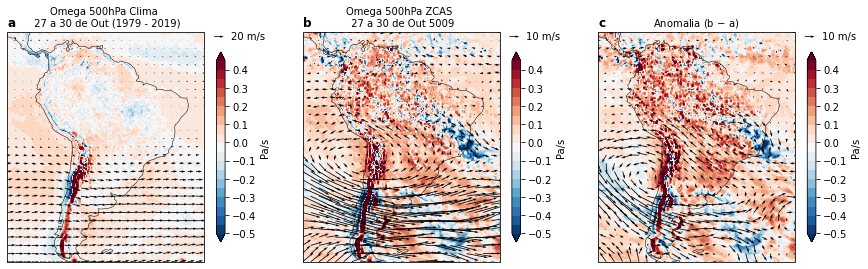

In [84]:
fig=plt.figure(figsize=(15,5))

ax = plt.subplot(131, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon, lat, w500_clima, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-0.5,0.5,0.05))
plt.colorbar(orientation='vertical', shrink=0.7, label='Pa/s')
q = ax.quiver(lon[::10], lat[::10], u500_clima[::10, ::10], v500_clima[::10,::10], 
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 20, r'20 m/s', labelpos='E')
plt.title('Omega 500hPa Clima \n 27 a 30 de Out (1979 - 2019)', fontsize=10)
plt.title('a', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(132, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon, lat, w500_zcas, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-0.5,0.5,0.05))
plt.colorbar(orientation='vertical', shrink=0.7, label='Pa/s')
q = ax.quiver(lon[::10], lat[::10], u500_zcas[::10, ::10], v500_zcas[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Omega 500hPa ZCAS \n 27 a 30 de Out 5009', fontsize=10)
plt.title('b', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(133, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon, lat, w500_anom, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-0.5,0.5,0.05))
plt.colorbar(orientation='vertical', shrink=0.7, label='Pa/s')
q = ax.quiver(lon[::10], lat[::10], u500_anom[::10, ::10], v500_anom[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Anomalia (b $-$ a)', fontsize=10)
plt.title('c', fontweight='bold', loc='left', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig('zcas_w500.png', dpi=300)
fig.savefig('zcas_w500.pdf')

#### Vort 500

/home/david/anaconda3/envs/zcas/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


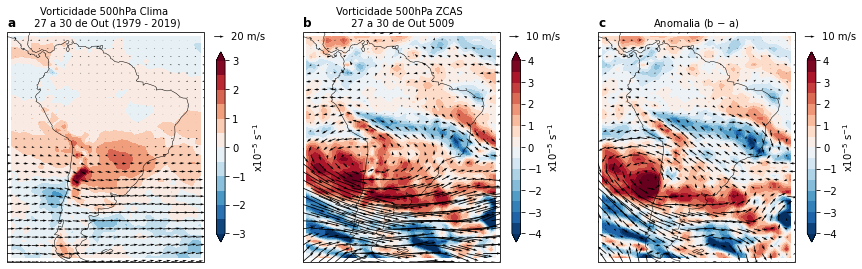

In [75]:
fig=plt.figure(figsize=(15,5))

ax = plt.subplot(131, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], vort500_clima, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-3,3.5,0.5))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u500_clima[::10, ::10], v500_clima[::10,::10], 
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 20, r'20 m/s', labelpos='E')
plt.title('Vorticidade 500hPa Clima \n 27 a 30 de Out (1979 - 2019)', fontsize=10)
plt.title('a', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(132, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], vort500_zcas, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-4,4.5,0.5))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u500_zcas[::10, ::10], v500_zcas[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Vorticidade 500hPa ZCAS \n 27 a 30 de Out 5009', fontsize=10)
plt.title('b', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(133, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], vort500_anom, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-4,4.5,0.5))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u500_anom[::10, ::10], v500_anom[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Anomalia (b $-$ a)', fontsize=10)
plt.title('c', fontweight='bold', loc='left', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig('zcas_vort500.png', dpi=300)
fig.savefig('zcas_vort500.pdf')

#### Vort 200

/home/david/anaconda3/envs/zcas/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


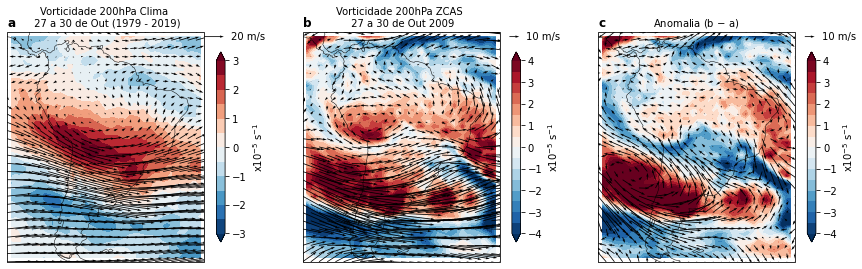

In [86]:
fig=plt.figure(figsize=(15,5))

ax = plt.subplot(131, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], vort200_clima, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-3,3.5,0.5))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u200_clima[::10, ::10], v200_clima[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 20, r'20 m/s', labelpos='E')
plt.title('Vorticidade 200hPa Clima \n 27 a 30 de Out (1979 - 2019)', fontsize=10)
plt.title('a', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(132, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], vort200_zcas, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-4,4.5,0.5))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u200_zcas[::10, ::10], v200_zcas[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Vorticidade 200hPa ZCAS \n 27 a 30 de Out 2009', fontsize=10)
plt.title('b', fontweight='bold', loc='left', fontsize=12)

ax = plt.subplot(133, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon[::5], lat[::5], vort200_anom, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-4,4.5,0.5))
plt.colorbar(orientation='vertical', shrink=0.7, label='x10$^{-5}$ s$^{-1}$')
q = ax.quiver(lon[::10], lat[::10], u200_anom[::10, ::10], v200_anom[::10,::10], scale=200,
              transform=ccrs.PlateCarree(), color='k',width=0.004, minlength=0.1)
qk = ax.quiverkey(q, 1.1, 0.98, 10, r'10 m/s', labelpos='E')
plt.title('Anomalia (b $-$ a)', fontsize=10)
plt.title('c', fontweight='bold', loc='left', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig('zcas_vort200.png', dpi=300)
fig.savefig('zcas_vort200.pdf')